In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
y = df['quality']
X = df.drop('quality', 1)

In [7]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [8]:
y.head(10)

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [9]:
correlation = X.corr()

correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09


In [10]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=6)

In [11]:
clf = clf.fit(X, y)

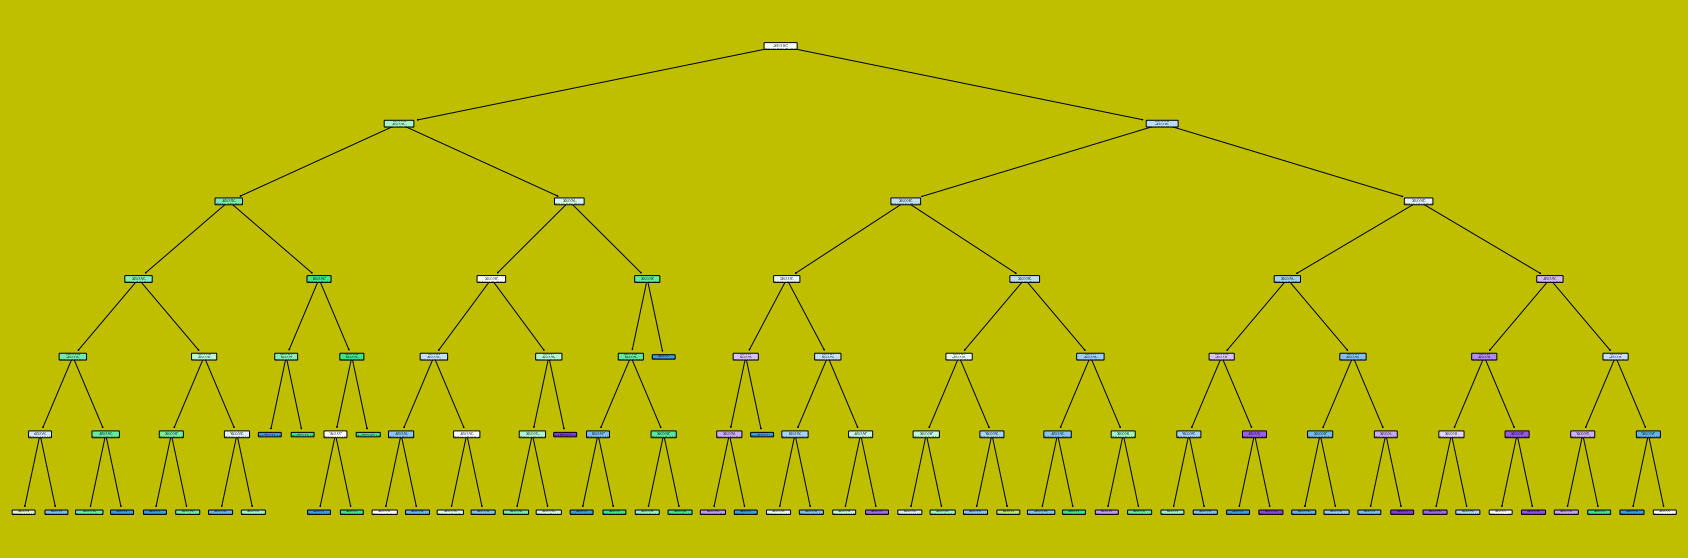

In [12]:
plt.figure(figsize=(30,10), facecolor='y')

tree_plot = tree.plot_tree(clf, filled=True, rounded=True)
plt.show()

In [13]:
importance = clf.feature_importances_
col_names = X.columns

for i, tab in enumerate(zip(col_names, importance)):
    print('{0:2}. {1:20}  {2}'.format(i, tab[0], tab[1]))

 0. fixed acidity         0.016798655527215715
 1. volatile acidity      0.08284727193663846
 2. citric acid           0.045012301348718496
 3. residual sugar        0.07812807553752027
 4. chlorides             0.01941323585928673
 5. free sulfur dioxide   0.06667040654784631
 6. total sulfur dioxide  0.12476021466226984
 7. density               0.019366817804518405
 8. pH                    0.07614962047335788
 9. sulphates             0.13896052078344648
10. alcohol               0.3318928795191814


In [15]:
X_result = pd.DataFrame()
thresh = 0.02 #0.045 dla depth: 5

for i, col in enumerate(col_names):
    if importance[i] > thresh:
        X_result[col] = X[col]

X_result['quality'] = y

In [16]:
X_result.drop_duplicates()
X_result.shape

(1599, 9)

In [17]:
correlation = X_result.corr()

correlation.style.background_gradient(cmap='coolwarm').set_precision(2)

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
volatile acidity,1.00,-0.55,0.00,-0.01,0.08,0.23,-0.26,-0.20,-0.39
citric acid,-0.55,1.00,0.14,-0.06,0.04,-0.54,0.31,0.11,0.23
residual sugar,0.00,0.14,1.00,0.19,0.20,-0.09,0.01,0.04,0.01
free sulfur dioxide,-0.01,-0.06,0.19,1.00,0.67,0.07,0.05,-0.07,-0.05
total sulfur dioxide,0.08,0.04,0.20,0.67,1.00,-0.07,0.04,-0.21,-0.19
pH,0.23,-0.54,-0.09,0.07,-0.07,1.00,-0.20,0.21,-0.06
sulphates,-0.26,0.31,0.01,0.05,0.04,-0.20,1.00,0.09,0.25
alcohol,-0.20,0.11,0.04,-0.07,-0.21,0.21,0.09,1.00,0.48
quality,-0.39,0.23,0.01,-0.05,-0.19,-0.06,0.25,0.48,1.00


In [18]:
X_result.head(10)

,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5
1,0.88,0.00,2.6,25.0,67.0,3.20,0.68,9.8,5
2,0.76,0.04,2.3,15.0,54.0,3.26,0.65,9.8,5
3,0.28,0.56,1.9,17.0,60.0,3.16,0.58,9.8,6
4,0.70,0.00,1.9,11.0,34.0,3.51,0.56,9.4,5
5,0.66,0.00,1.8,13.0,40.0,3.51,0.56,9.4,5
6,0.60,0.06,1.6,15.0,59.0,3.30,0.46,9.4,5
7,0.65,0.00,1.2,15.0,21.0,3.39,0.47,10.0,7
8,0.58,0.02,2.0,9.0,18.0,3.36,0.57,9.5,7
9,0.50,0.36,6.1,17.0,102.0,3.35,0.80,10.5,5


In [19]:
#random_generator = np.random.RandomState()

#train = X_result.sample(frac=0.9, random_state=random_generator)
#test = X_result.loc[~X_result.index.isin(train.index)]

In [20]:
#print(train.shape, test.shape)

In [21]:
#train.to_csv('winequality-red-train.dat', sep=' ', header=False, index=False)
#test.to_csv('winequality-red-test.dat', sep=' ', header=False, index=False)
X_result.to_csv('winequality-red.dat', sep=' ', header=False, index=False)